In [2]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.constants as scc
import astropy.units as u
from astropy.constants import G, h, k_B, c

In [3]:
import astropy.units as u
from astropy.constants import G, h, k_B, c

def calculate_T_surface(longitude = np.arange(-180,180,1)*u.degree, 
                        epsilon_5_over_2 = 1.0,
                        R_star = 0.943*u.solRad,
                        d_star = 0.01544*u.AU,
                        T_star = 5172.0*u.Kelvin,
                        nightside_T = 1045.0*u.Kelvin,
                       G = 0.9):

    T_surf = (epsilon_5_over_2**0.25) *G* ((R_star.si/d_star.si)**0.5)*(np.cos(longitude.si)**0.25)*T_star
    T_surf = np.nan_to_num(T_surf,0) + nightside_T
    return T_surf

T_cancri = np.load("./data/T_cancri.npy")
Longitude_axis = np.linspace(-109.8, 109.8, len(T_cancri))

<ErrorbarContainer object of 3 artists>

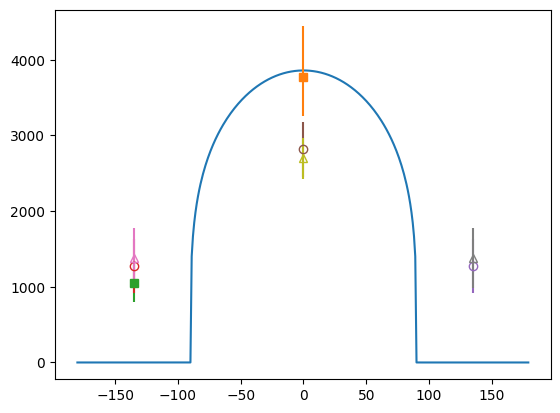

In [17]:
longitude = np.arange(-180,180,1)*u.degree
T_surf = calculate_T_surface(nightside_T=0*u.Kelvin, G=1.4)

plt.plot(longitude,T_surf)
#plt.plot(Longitude_axis-45,T_cancri)
plt.errorbar(np.array([[0]]),
             np.array([[3771]]), 
             yerr=np.array([[520],[669]]),
            marker="s", label="M2022")

plt.errorbar(np.array([[-90-45]]),
             np.array([[1045]]), 
             yerr=np.array([[243],[302]]),
            marker="s", label="M2022")

plt.errorbar(-135,1273,yerr=360,marker="o", mfc="none", label="D2016a")
plt.errorbar(+135,1273,yerr=360,marker="o", mfc="none", label="D2016a")
plt.errorbar(0,2816,yerr=360,marker="o", mfc="none", label="D2016a")
plt.errorbar(-135,1380,yerr=400,marker="^", mfc="none", label="D2016b")
plt.errorbar(+135,1380,yerr=400,marker="^", mfc="none", label="D2016b")
plt.errorbar(0,2700,yerr=270,marker="^", mfc="none", label="D2016b")


In [19]:
T_surf

<Quantity [0.03961916, 0.03961916, 0.03961916, 0.03961916, 0.03961916,
           0.03961916, 0.03961916, 0.03961916, 0.03961916, 0.03961916,
           0.03961916, 0.03961916, 0.03961916, 0.03961916, 0.03961916,
           0.03961916, 0.03961916, 0.03961916, 0.03961916, 0.03961916,
           0.03961916, 0.03961916, 0.03961916, 0.03961916, 0.03961916,
           0.03961916, 0.03961916, 0.03961916, 0.03961916, 0.03961916,
           0.03961916, 0.03961916, 0.03961916, 0.03961916, 0.03961916,
           0.03961916, 0.03961916, 0.03961916, 0.03961916, 0.03961916,
           0.03961916, 0.03961916, 0.03961916, 0.03961916, 0.03961916,
           0.03961916, 0.03961916, 0.03961916, 0.03961916, 0.03961916,
           0.03961916, 0.03961916, 0.03961916, 0.03961916, 0.03961916,
           0.03961916, 0.03961916, 0.03961916, 0.03961916, 0.03961916,
           0.03961916, 0.03961916, 0.03961916, 0.03961916, 0.03961916,
           0.03961916, 0.03961916, 0.03961916, 0.03961916, 0.03961916,
      

Spectral radiance at 500.0 nm for 5137 K: 14123091025509.31 W/m^2/sr/m
Maximum radiation is at 0.56 micrometers at 5137 K


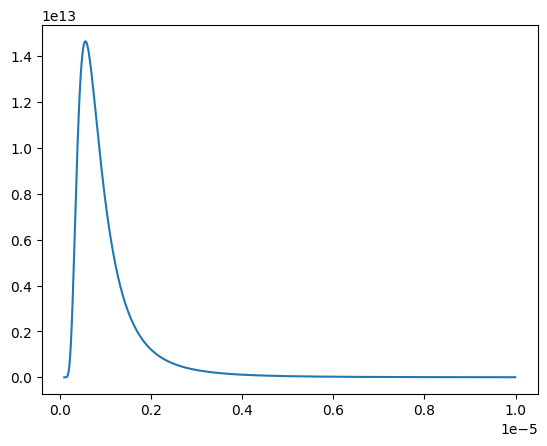

In [81]:
import numpy as np

def blackbody_radiation(wavelength, temperature):
    """
    Calculate the spectral radiance of a blackbody at a specific temperature and wavelength.
    
    Parameters:
    wavelength (float or np.ndarray): Wavelength in meters.
    temperature (float): Temperature in Kelvin.
    
    Returns:
    float or np.ndarray: Spectral radiance in W/m^2/sr/m.
    """
    # Constants
    h = 6.62607015e-34  # Planck's constant (m^2 kg / s)
    c = 2.99792458e8    # Speed of light (m / s)
    k = 1.380649e-23    # Boltzmann constant (m^2 kg / s^2 K)

    # Planck's law
    spectral_radiance = (2 * h * c**2 / wavelength**5) / (np.exp(h * c / (wavelength * k * temperature)) - 1)
    
    return spectral_radiance

# Example usage
wavelength = 500e-9  # 500 nm in meters
temperature = 5137   # Temperature of the sun in Kelvin
radiance = blackbody_radiation(wavelength, temperature)
print(f"Spectral radiance at {wavelength*1e9} nm for {temperature} K: {radiance} W/m^2/sr/m")

wavelength_axis = np.arange(0.1,10,0.01)*1e-6
simulated_radiation = blackbody_radiation(wavelength_axis,temperature)
plt.plot(wavelength_axis, simulated_radiation)

peak_idx = find_peaks(simulated_radiation)
print("Maximum radiation is at {:.2f} micrometers at {} K".format(wavelength_axis[peak_idx[0][0]]*1e6,temperature))

In [72]:
from scipy.signal import find_peaks

(array([122]), {})